<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/AFL2_Group5_Kwandy_Ricky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kwandy Chandra - 0706022210001
Ricky Jonathan Harianto Tjahjono - 0706022210005

## AFL 2

### Import Library

Import the necessary libraries

In [37]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset

Load dataset

In [38]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining/refs/heads/main/customer_analysis%20(1).csv', delimiter = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [39]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [41]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


2.

In [42]:
df.isna().mean()*100

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i



```
```

Since there are only some nulls on Income we will fill it with means

In [44]:
# imputer = SimpleImputer(strategy='most_frequent')

# df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df['Income'] = df['Income'].fillna(df['Income'].median()).astype(int)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [45]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Drop the column 'ID' because all the values are different.

In [46]:
# Drop constant/low-variance features
columns_to_drop = [
    'Z_CostContact', 'Z_Revenue',  # Constant/Low-variance features
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',  # Sparse/Binary features
    'Complain', 'Response',  # Features with likely minimal impact
    'Year_Birth'  # Consider replacing this with 'Age' if relevant
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the cleaned dataset's first few rows
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [47]:
# List of top 5 features
top_features = ['Income', 'MntWines', 'NumCatalogPurchases']

# Create a new DataFrame with only the selected features
df = df[top_features]

# Display the first few rows of the new DataFrame
print(df.head())


   Income  MntWines  NumCatalogPurchases
0   58138       635                   10
1   46344        11                    1
2   71613       426                    2
3   26646        11                    0
4   58293       173                    3


3.

In [48]:
le = LabelEncoder()
marital_status_mapping = {
    'Single': 0,
    'Together': 1,
    'Married': 2,
    'Divorced': 3,
    'Widow': 4,
    'Alone': 5,
    'Absurd': 6,
    'YOLO': 7
}
# df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)

education_mapping = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}
# df['Education'] = df['Education'].map(education_mapping)
# df['Dt_Customer'] = le.fit_transform(df['Dt_Customer'])
df.head()

,Income,MntWines,NumCatalogPurchases
0,58138,635,10
1,46344,11,1
2,71613,426,2
3,26646,11,0
4,58293,173,3


check the data type

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               2240 non-null   int64
 1   MntWines             2240 non-null   int64
 2   NumCatalogPurchases  2240 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


Change the data types from:

- float to int
- object to int

In [50]:
# Loop through all columns with dtype 'object' and convert them to integers
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(int)

# Check the updated DataFrame info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               2240 non-null   int64
 1   MntWines             2240 non-null   int64
 2   NumCatalogPurchases  2240 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


4.

In [51]:
df.describe()

,Income,MntWines,NumCatalogPurchases
count,2240.000000,2240.000000,2240.000000
mean,52237.970089,303.935714,2.662054
std,25037.956074,336.597393,2.923101
min,1730.000000,0.000000,0.000000
25%,35538.750000,23.750000,0.000000
50%,51381.000000,173.500000,2.000000
75%,68289.750000,504.250000,4.000000
max,666666.000000,1493.000000,28.000000


In [52]:
# # Calculate Q1, Q3, and IQR for each column
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Outlier thresholds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Check for outliers
# outliers = (df < lower_bound) | (df > upper_bound)
# print(outliers.sum())  # Number of outliers per column

# # Cap outliers (Winsorization) by clipping them to the IQR boundaries
# df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

# # Verify changes
# df.describe()


In [53]:
# scaling data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Income,MntWines,NumCatalogPurchases
0,0.084832,0.425318,0.357143
1,0.067095,0.007368,0.035714
2,0.105097,0.285332,0.071429
3,0.037471,0.007368,0.000000
4,0.085065,0.115874,0.107143


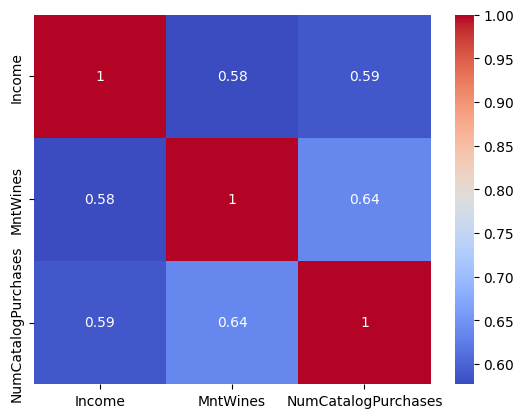

<Figure size 2e+06x160000 with 0 Axes>

In [54]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(20000, 1600))  # Width x Height in inches
plt.show()

## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

*   List item
*   List item



Use the elbow range range(1, 29)

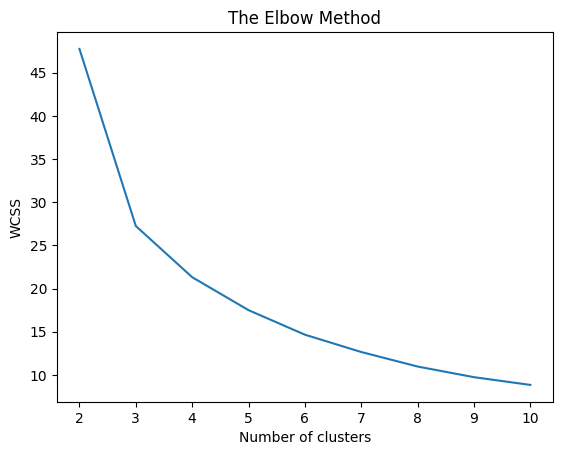

In [55]:

wcss = []
for i in range(2, 11):
    kmeans=KMeans(n_clusters=i, init='random', max_iter=500, n_init=100, random_state=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
print(f"The optimal k of model is: {kl.elbow}")

The optimal k of model is: 4


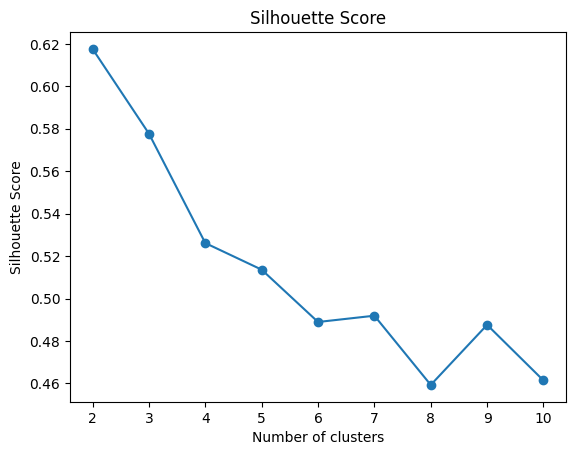

Best k: 2


In [57]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
for k in range(2, 11):  # Test k from 2 to 10
    kmeans = KMeans(n_clusters=k, init='random', max_iter=500, n_init=100, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))


plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print(f"Best k: {best_k}")


Train the K-Means model on the dataset with the number of clusters you have determined.

In [58]:
kmeans = KMeans(n_clusters= kl.elbow, init='random', max_iter=500, n_init=100, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([1, 0, 3, ..., 2, 3, 0], dtype=int32)

In [59]:
silhouette_avg = silhouette_score(df_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5261545569899486


In [60]:
kmeans = KMeans(n_clusters= best_k, init='random', max_iter=500, n_init=100, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

In [61]:
silhouette_avg = silhouette_score(df_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6176232547687495


In [62]:
# Inverse transform the scaled data to get the original values

original_data = scaler.inverse_transform(df_scaled)
df_inverse = pd.DataFrame(original_data, columns=df_scaled.columns)

df_inverse['KMeans'] = y_pred
df_inverse.head()

,Income,MntWines,NumCatalogPurchases,KMeans
0,58138.0,635.0,10.0,1
1,46344.0,11.0,1.0,0
2,71613.0,426.0,2.0,0
3,26646.0,11.0,0.0,0
4,58293.0,173.0,3.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [63]:
# Define aggregation rules for categorical and continuous columns
agg_rules = {
    # 'Year_Birth': [pd.Series.mode, 'min', 'max'],  # Categorical (mode)
    # 'Education': ['mean', 'min', 'max'],           # Continuous (mean, min, max)
    # 'Marital_Status': [pd.Series.mode, 'min', 'max'],  # Categorical
    'Income': ['mean', 'min', 'max'],             # Continuous
    # 'Kidhome': [pd.Series.mode, 'min', 'max'],    # Categorical
    # 'Teenhome': [pd.Series.mode, 'min', 'max'],   # Categorical
    # 'Dt_Customer': ['mean', 'min', 'max'],        # Continuous
    # 'Recency': ['mean', 'min', 'max'],            # Continuous
    'MntWines': ['mean', 'min', 'max'],           # Continuous
    # 'MntFruits': ['mean', 'min', 'max'],          # Continuous
    # 'MntMeatProducts': ['mean', 'min', 'max'],    # Continuous
    # 'MntFishProducts': ['mean', 'min', 'max'],    # Continuous
    # 'MntSweetProducts': ['mean', 'min', 'max'],   # Continuous
    # 'MntGoldProds': ['mean', 'min', 'max'],       # Continuous
    # 'NumDealsPurchases': ['mean', 'min', 'max'],  # Continuous
    # 'NumWebPurchases': ['mean', 'min', 'max'],    # Continuous
    'NumCatalogPurchases': ['mean', 'min', 'max'],# Continuous
    # 'NumStorePurchases': ['mean', 'min', 'max'],  # Continuous
    # 'NumWebVisitsMonth': ['mean', 'min', 'max'],  # Continuous
    # 'AcceptedCmp3': [pd.Series.mode, 'min', 'max'],  # Categorical
    # 'AcceptedCmp4': [pd.Series.mode, 'min', 'max'],  # Categorical
    # 'AcceptedCmp5': [pd.Series.mode, 'min', 'max'],  # Categorical
    # 'AcceptedCmp1': [pd.Series.mode, 'min', 'max'],  # Categorical
    # 'AcceptedCmp2': [pd.Series.mode, 'min', 'max'],  # Categorical
    # # 'Complain': [pd.Series.mode, 'min', 'max'],      # Categorical
    # 'Z_CostContact': ['mean', 'min', 'max'],         # Continuous
    # 'Z_Revenue': ['mean', 'min', 'max'],             # Continuous
    # # 'Response': [pd.Series.mode, 'min', 'max']       # Categorical
}

# Group by cluster and apply aggregation
cluster_summary = df_inverse.groupby('KMeans').agg(agg_rules)

cluster_summary = cluster_summary.T

cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

cluster_summary.columns.name = 'KMeans'

cluster_summary


KMeans                        Cluster 0      Cluster 1
Income              mean   43283.597649   71573.857546
                    min     1730.000000    2447.000000
                    max   666666.000000  160803.000000
MntWines            mean     109.308295     724.210155
                    min        0.000000       1.000000
                    max      457.000000    1493.000000
NumCatalogPurchases mean       1.354670       5.485190
                    min        0.000000       1.000000
                    max       22.000000      28.000000

In [64]:
# count data from each cluster
cluster_counts = df_inverse['KMeans'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
KMeans,
0,1531
1,709


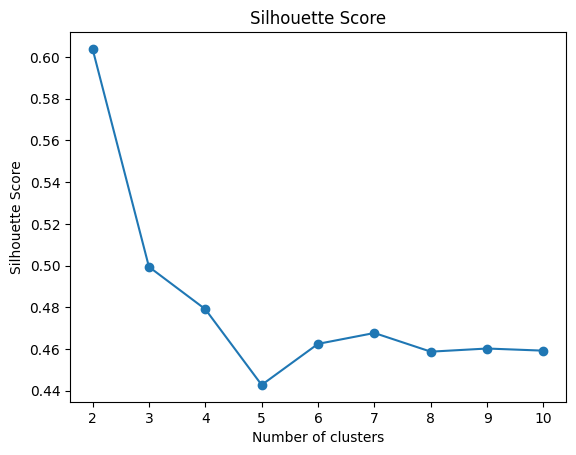

Best k: 2


In [65]:

# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(df_scaled, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print(f"Best k: {best_k}")


Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [66]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, y_hc)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6039028392160032


In [67]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['KMeans'] = y_pred
df_inverse['Agglo'] = y_hc

# show the df
df_inverse.head()

,Income,MntWines,NumCatalogPurchases,KMeans,Agglo
0,58138.0,635.0,10.0,1,1
1,46344.0,11.0,1.0,0,0
2,71613.0,426.0,2.0,0,0
3,26646.0,11.0,0.0,0,0
4,58293.0,173.0,3.0,0,0


Display the cluster summary in the form of a dataframe.

In [68]:
agg_rules = {
    'Income': ['mean', 'min', 'max'],             # Continuous
    'MntWines': ['mean', 'min', 'max'],           # Continuous
    'NumCatalogPurchases': ['mean', 'min', 'max'],# Continuous
    # 'MntMeatProducts': ['mean', 'min', 'max'],    # Continuous
    # 'NumWebPurchases': ['mean', 'min', 'max'],    # Continuous
}


cluster_summary = df_inverse.groupby('Agglo').agg(agg_rules)

cluster_summary = cluster_summary.T

# cluster_summary = cluster_summary.T

# cluster_summary.columns = [f'{i}' for i in range(cluster_summary.shape[1])]

# cluster_summary.columns.name = 'Agglo'

cluster_summary

Agglo                                 0              1
Income              mean   45567.030842   72539.781588
                    min     1730.000000   44802.000000
                    max   666666.000000  105471.000000
MntWines            mean     141.218861     799.135379
                    min        0.000000     412.000000
                    max      577.000000    1493.000000
NumCatalogPurchases mean       1.674970       5.666065
                    min        0.000000       2.000000
                    max       28.000000      11.000000

In [69]:
cluster_counts = df_inverse['Agglo'].value_counts().sort_index()

cluster_counts

,count
Agglo,
0,1686
1,554


**Hierarchical Visualization**

Single Linkage

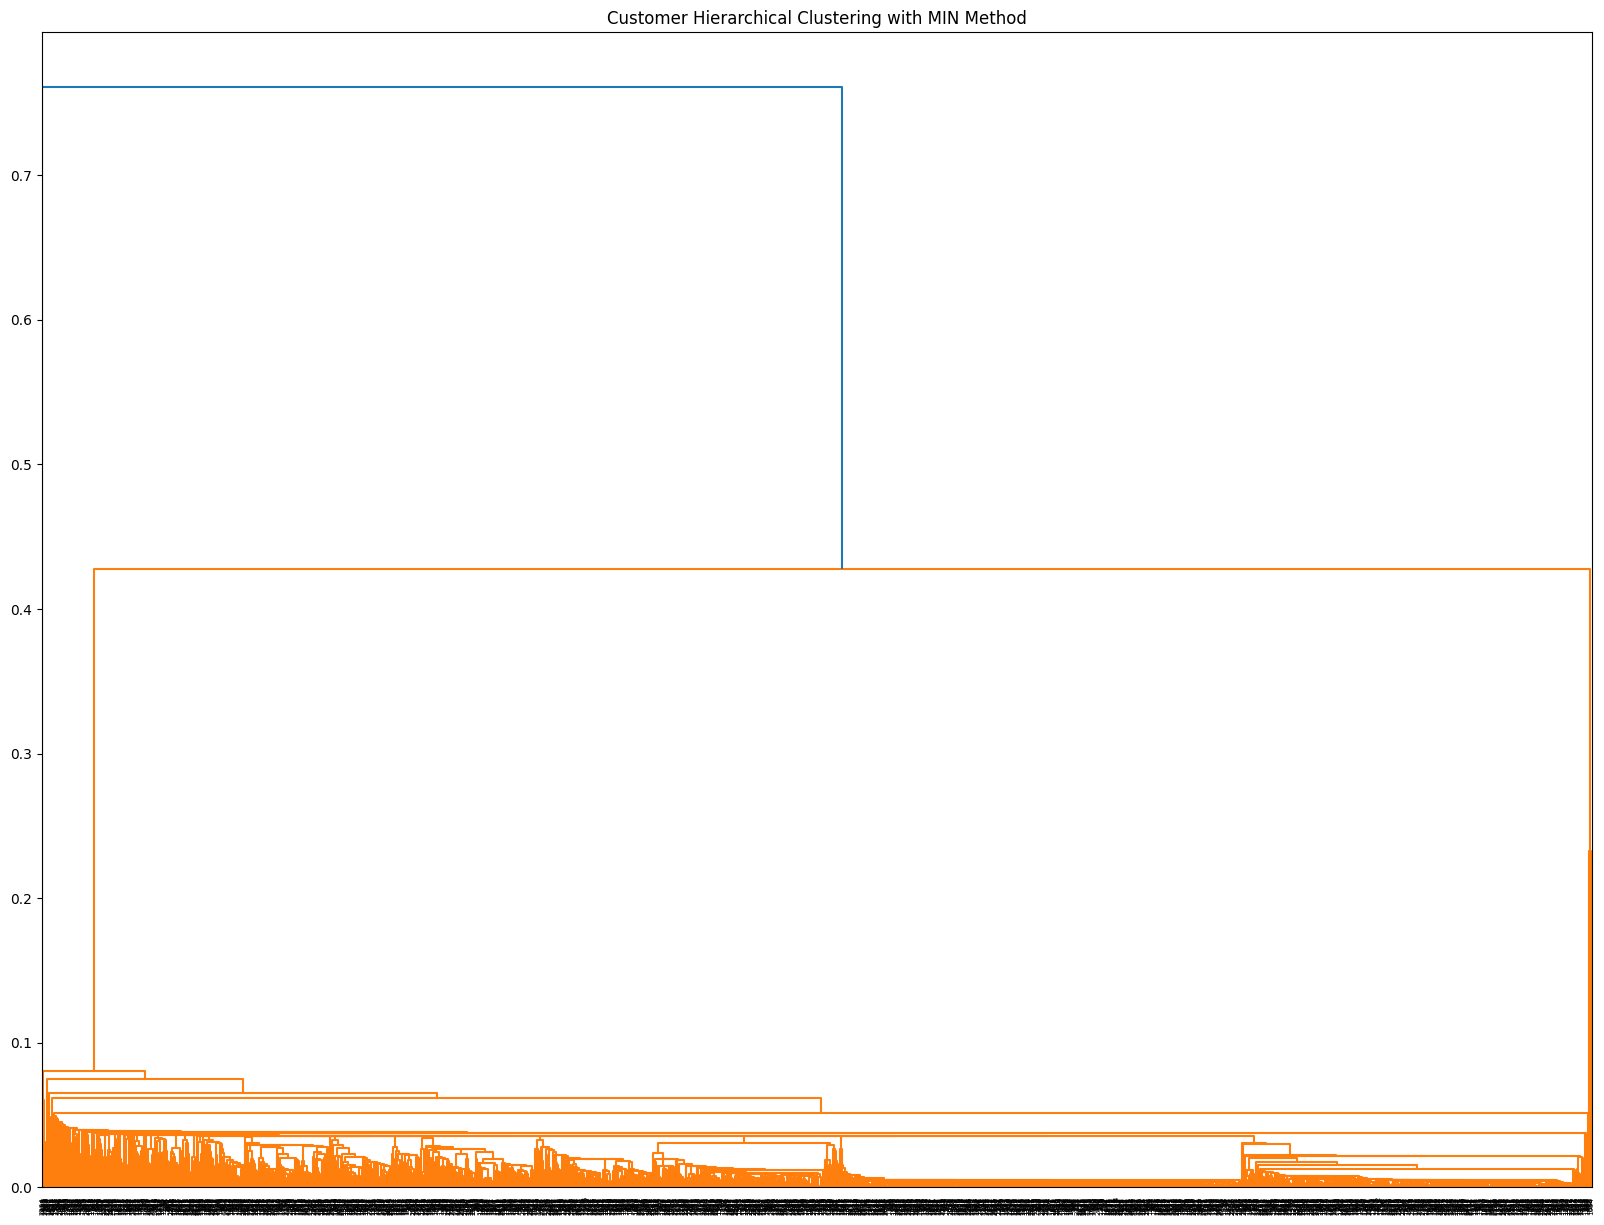

In [70]:
# Perform hierarchical clustering using the MIN Single linkage method
single_linkage = linkage(df_scaled, method='single')

# Plot the dendrogram
plt.figure(figsize=(20, 15))
dendrogram = sch.dendrogram(
    single_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with MIN Method')
plt.xticks(fontsize=5)
plt.show()

complete linkage

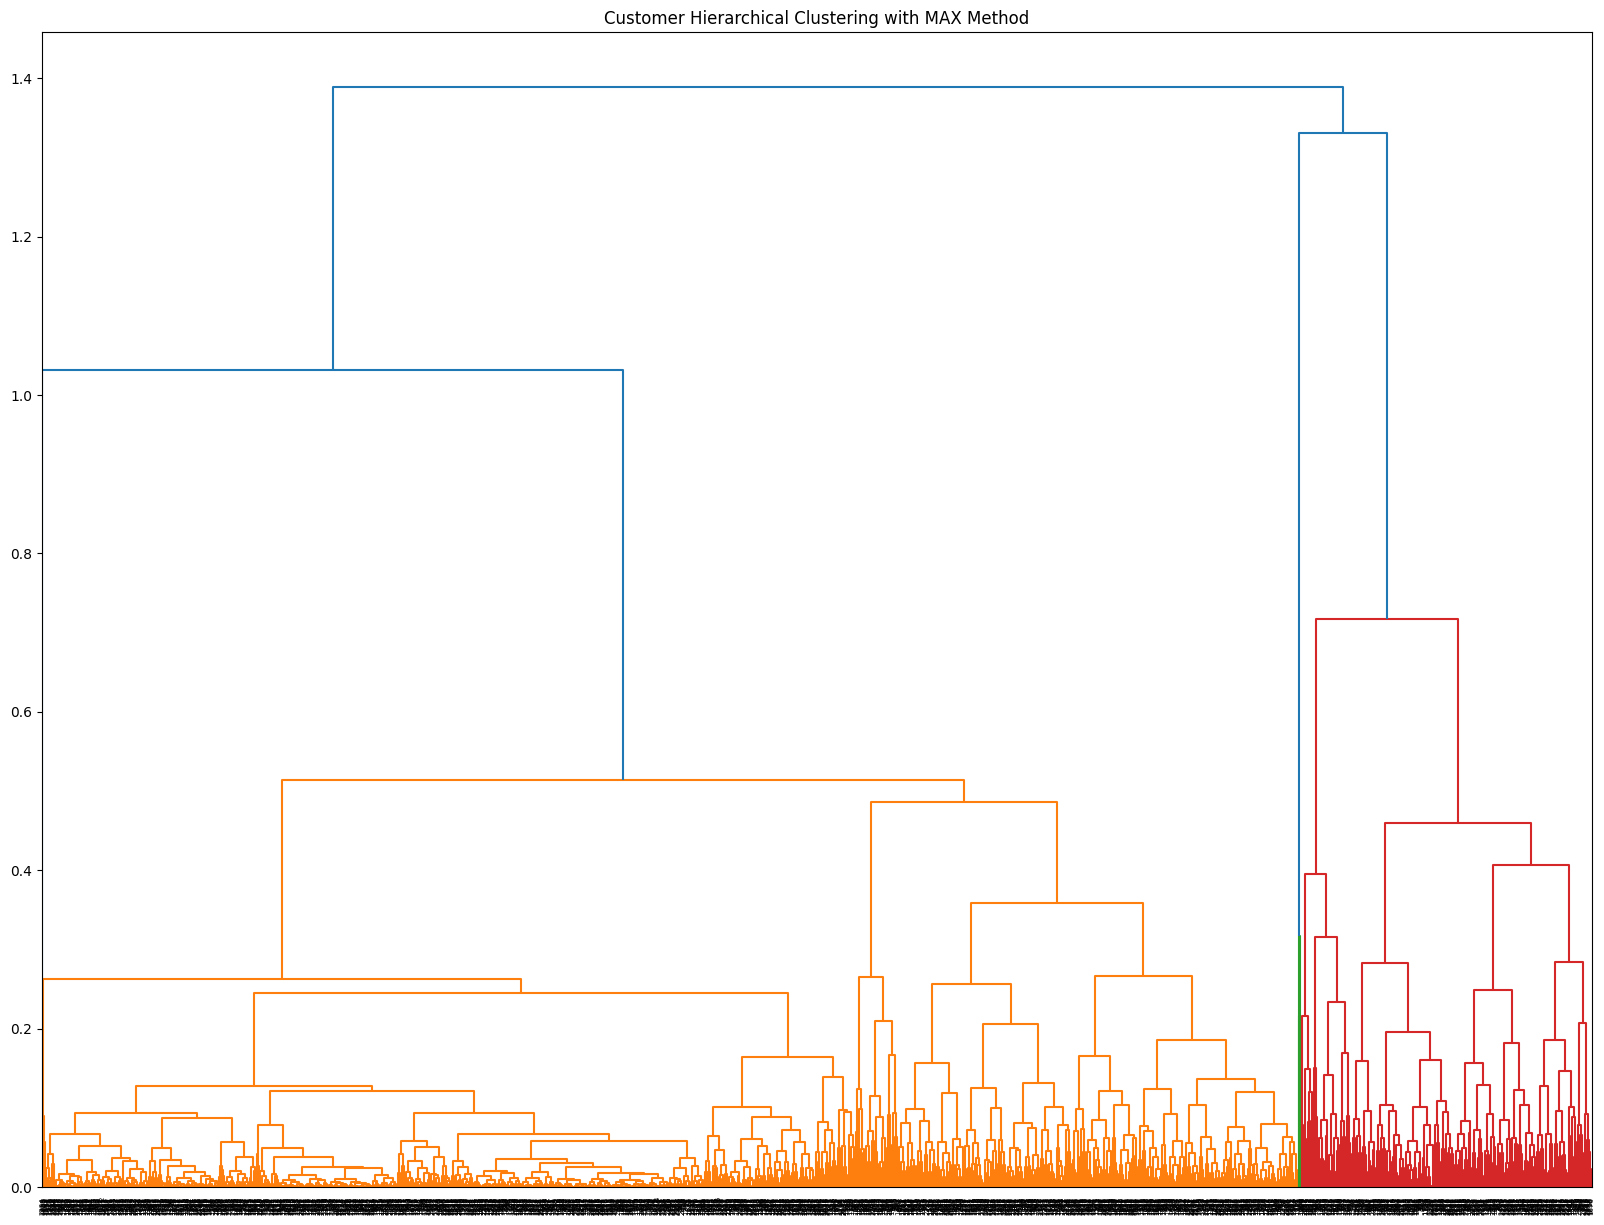

In [71]:
# Perform hierarchical clustering using the MAX Complete linkage method
complete_linkage = linkage(df_scaled, method='complete')

# Plot the dendrogram
plt.figure(figsize=(20, 15))
dendrogram = sch.dendrogram(
    complete_linkage,
    labels=list(range(1, len(df_scaled) + 1)),
)

plt.title('Customer Hierarchical Clustering with MAX Method')
plt.xticks(fontsize=5)
plt.show()

average linkage

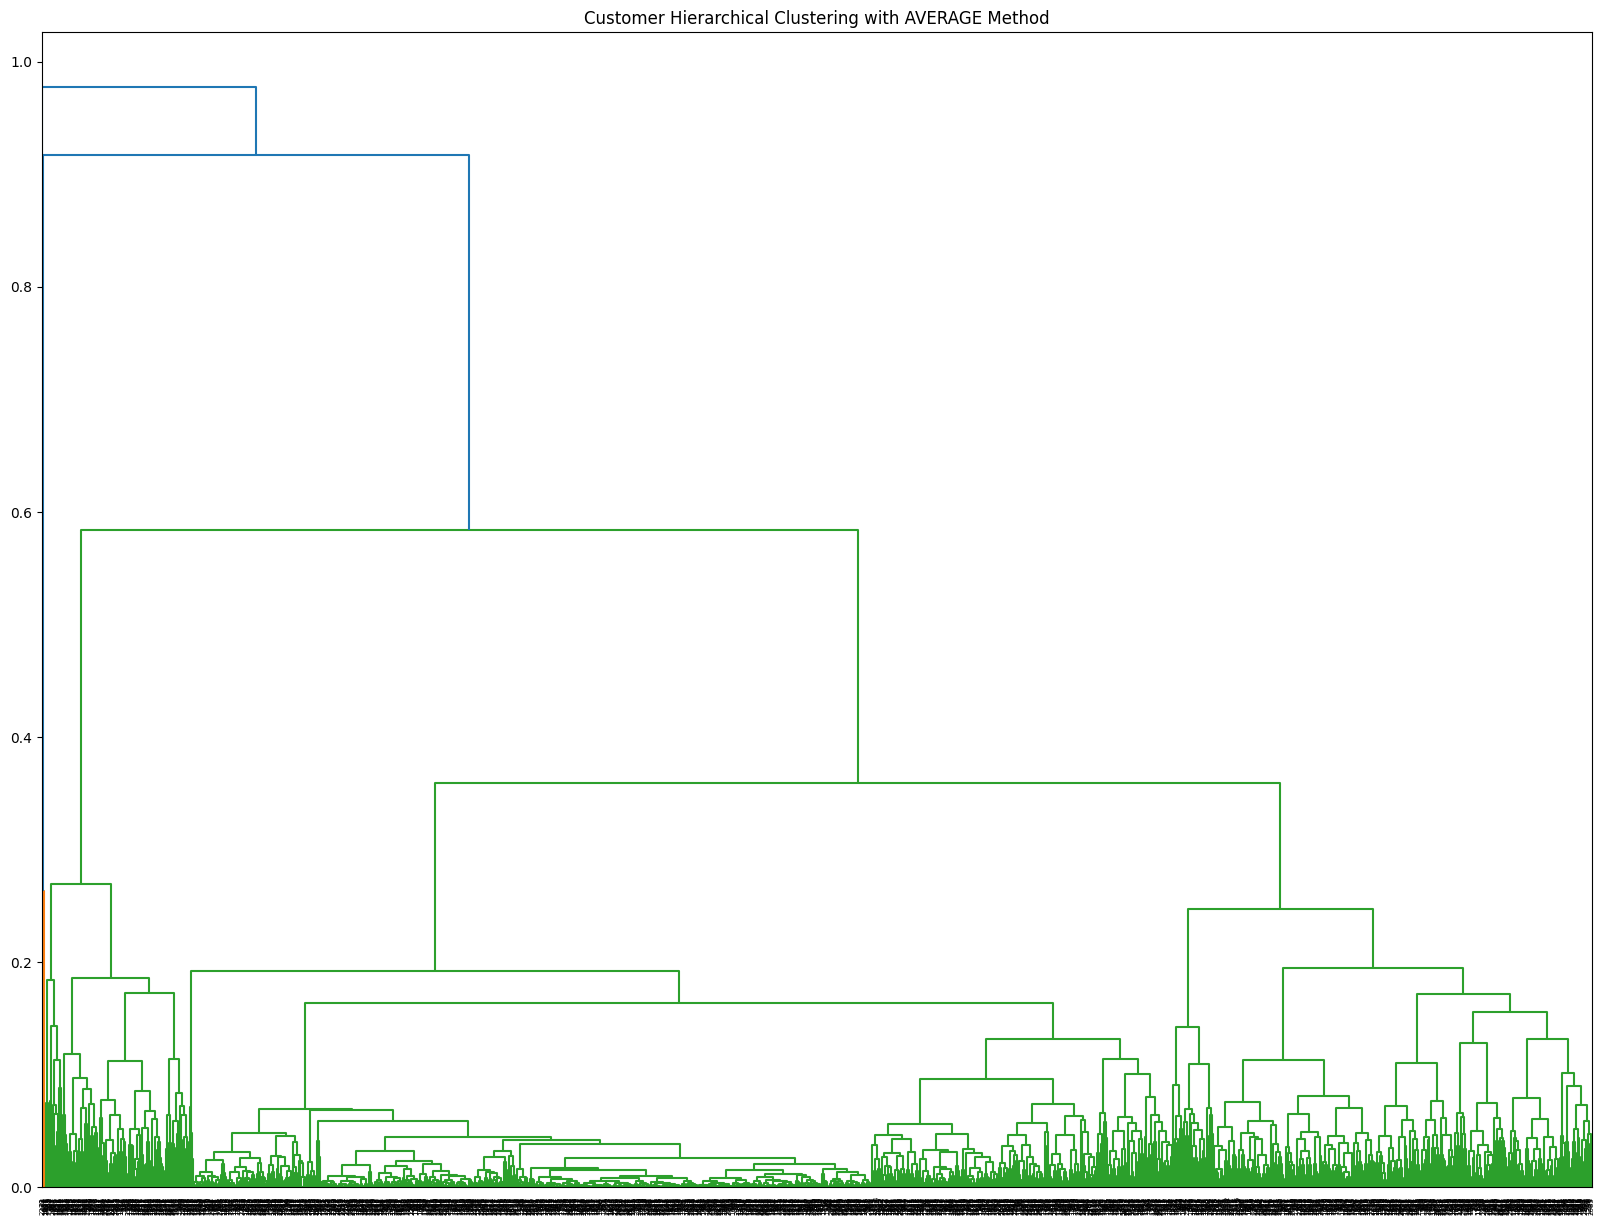

In [72]:
# Perform hierarchical clustering using the AVERAGE linkage method
average_linkage = linkage(df_scaled, method='average')

# Plot the dendrogram
plt.figure(figsize=(20, 15))
dendrogram = sch.dendrogram(
    average_linkage,
    leaf_rotation=90,
    leaf_font_size=5,
    color_threshold=0.7 * max(average_linkage[:, 2]),
)
plt.title("Customer Hierarchical Clustering with AVERAGE Method")
plt.xticks(fontsize=5)
plt.show()